数据变量介绍：train.csv

- SaleID - 销售ID
- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

数字全都脱敏处理，都为label encoding形式，即数字形式

# 导入库

In [1]:
# 数据分析和挖掘
import pandas as pd
import numpy as np
import random as rnd
import missingno as msno

# 可视化
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#意思是将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口

#以后只要用到matplotlib.pyplot，都需要设置这两句话，否则会报错untimeWarning: Glyph ....

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

from operator import itemgetter
# machine learning
from sklearn.linear_model import LogisticRegression  #逻辑回归
from sklearn.svm import SVC, LinearSVC               #支持向量机
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.neighbors import KNeighborsClassifier   #K最邻近算法
from sklearn.naive_bayes import GaussianNB           #朴素贝叶斯
from sklearn.linear_model import Perceptron           #感知机算法 
from sklearn.linear_model import SGDClassifier        #梯度下降分类
from sklearn.tree import DecisionTreeClassifier       #决策树算法

# 导入数据集

In [2]:
Train_old = pd.read_csv('Train_old.csv')
Test_old = pd.read_csv('Test_old.csv')
print('Train_old shape:',Train_old.shape)
print('Test_old shape:',Test_old.shape)
Train_old.head().append(Train_old.tail())

Train_old shape: (150000, 31)
Test_old shape: (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,微型车,汽油,手动,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,厢型车,汽油,手动,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,微型车,汽油,手动,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,豪华轿车,汽油,自动,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,微型车,汽油,手动,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,敞篷车,汽油,自动,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,豪华轿车,汽油,手动,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,微型车,柴油,手动,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,大巴车,柴油,手动,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,商务车,汽油,自动,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [3]:
all_data=[Train_old,Test_old]
for data in all_data:
    data['bodyType']=data['bodyType'].replace('豪华轿车',0)
    data['bodyType']=data['bodyType'].replace('微型车',1)
    data['bodyType']=data['bodyType'].replace('厢型车',2)
    data['bodyType']=data['bodyType'].replace('大巴车',3)
    data['bodyType']=data['bodyType'].replace('敞篷车',4)
    data['bodyType']=data['bodyType'].replace('双门汽车',5)
    data['bodyType']=data['bodyType'].replace('商务车',6)
    data['bodyType']=data['bodyType'].replace('搅拌车',7)
    data['fuelType']=data['fuelType'].replace('汽油',0)
    data['fuelType']=data['fuelType'].replace('柴油',1)
    data['fuelType']=data['fuelType'].replace('液化石油气',2)
    data['fuelType']=data['fuelType'].replace('天然气',3)
    data['fuelType']=data['fuelType'].replace('混合动力',4)
    data['fuelType']=data['fuelType'].replace('其他',5)
    data['fuelType']=data['fuelType'].replace('电动',6)
    data['gearbox']=data['gearbox'].replace('手动',0)
    data['gearbox']=data['gearbox'].replace('自动',1)
    data['notRepairedDamage']=data['notRepairedDamage'].replace('是',0)
    data['notRepairedDamage']=data['notRepairedDamage'].replace('否',1)
    data['seller']=data['seller'].replace('个体',0)
    data['seller']=data['seller'].replace('非个体',1)
    data['offerType']=data['offerType'].replace('提供',0)
    data['offerType']=data['offerType'].replace('请求',1)

In [4]:
Train_old.head().append(Train_old.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [5]:
#Train_old.to_csv('used_car_train_20200313.csv',index=0)
#Test_old.to_csv('used_car_testA_20200313.csv',index=0)

In [2]:
Train_df = pd.read_csv('used_car_train.csv')
Test_df = pd.read_csv('used_car_test.csv')
print('Train_df shape:',Train_df.shape)
print('Test_df shape:',Test_df.shape)

Train_df shape: (150000, 31)
Test_df shape: (50000, 30)


# 数据分析(不处理任何数据，只是查看)

## 数据总览

In [7]:
Train_df.head().append(Train_df.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [9]:
Train_df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [10]:
Train_df['power'].describe(percentiles=[.8,.99])

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
50%         110.000000
80%         163.000000
99%         340.000000
max       19312.000000
Name: power, dtype: float64

In [11]:
Train_df.describe(include=[object])

,notRepairedDamage
count,150000
unique,3
top,0.0
freq,111361


In [12]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

## 查看分类数据

In [13]:
Train_df.describe(include='object')

,notRepairedDamage
count,150000
unique,3
top,0.0
freq,111361


In [14]:
Train_df['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [15]:
#查看notRepairedDamage实际上的缺失行'-'
Train_df[Train_df.notRepairedDamage=='-']

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
14,14,1896,20070009,1.0,0,NaN,NaN,0.0,0,15.0,...,0.000000,0.117265,1.297219,0.040885,0.020187,2.550859,18.192443,5.145351,-0.836169,0.645098
18,18,104088,19981011,48.0,14,1.0,0.0,0.0,45,15.0,...,0.241012,0.000000,0.105674,0.034903,0.076203,3.882782,-0.027052,-2.837059,0.312270,0.841186
21,21,12784,20021009,8.0,0,0.0,NaN,NaN,116,15.0,...,0.261726,0.087796,0.097778,0.038767,0.050713,-2.902841,0.827034,-0.903175,-0.683878,0.470213
22,22,131637,19970008,26.0,14,1.0,0.0,0.0,75,15.0,...,0.237251,0.000000,0.126609,0.017123,0.093230,4.216986,0.346678,-3.941949,0.052169,-0.157513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149948,149948,93983,20010707,46.0,6,0.0,0.0,0.0,100,15.0,...,0.262441,0.000091,0.028303,0.054772,0.045762,3.027324,-1.438353,-1.635317,-0.034486,0.229194
149957,149957,3075,20000312,73.0,14,NaN,NaN,0.0,130,15.0,...,0.000000,0.096605,1.168120,0.035414,0.041257,4.497410,18.251639,2.878445,0.721490,0.014877
149972,149972,183896,20050004,41.0,6,NaN,NaN,NaN,0,15.0,...,0.000000,0.000199,1.149552,0.077486,0.041325,10.267495,14.904306,4.860209,1.492341,0.865779
149977,149977,23990,19941203,32.0,8,1.0,0.0,0.0,0,15.0,...,0.232356,0.066924,0.108563,0.008610,0.115829,-0.119752,2.357410,-4.214280,0.906995,-0.371553


## 查看数据总体缺失情况

<font size=5 color=red>下面是构造dataframe的所有方法（《利用python进行数据分析》书上的P133）

### 网页链接地址：[DataFrame的所有构造方式](https://blog.csdn.net/weixin_37855575/article/details/94466994)

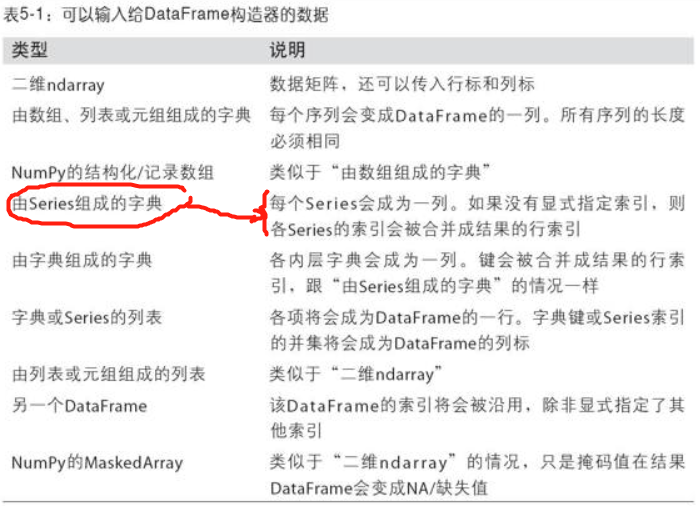

In [16]:
pd.set_option('display.max_columns',16)#设置显示的最大列数
Train_df_dtypes=Train_df.dtypes
Train_df_isnull=Train_df.isnull().any()
Train_df_nullsum=Train_df.isnull().sum()
Train_df_nullratio=Train_df.isnull().sum()/Train_df.shape[0]
Train_df_describe=pd.DataFrame([Train_df_dtypes,Train_df_isnull,Train_df_nullsum,Train_df_nullratio],index=['数据类型','列是否缺失','缺失个数','缺失比例'])
Train_df_describe

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
数据类型,int64,int64,int64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64
列是否缺失,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False
缺失个数,0,0,0,1,0,4506,8680,5981,...,0,0,0,0,0,0,0,0
缺失比例,0,0,0,6.66667e-06,0,0.03004,0.0578667,0.0398733,...,0,0,0,0,0,0,0,0


**下面两个操作达到一样的效果**

<font size=5 color=#0000EE>
重要知识点：  
    
<br/>       
loc索引在传入布尔索引的时候，一定要看看是不是布尔series，
    
这里如果不加.squeeze()那么就是布尔df了，loc不接受布尔df(当然布尔列表还是接受的)

In [17]:
#这边有一个新的函数.squeeze()，这个函数是将单行或单列dataframe转换成series，可选参数axis=0或者1
#Train_df_describe[1:2]返回df，如果不将他转换成series，程序会报错。因为这边的布尔索引只能传入布尔series，而不可以布尔df
Train_df_describe.loc[:,Train_df_describe[1:2].squeeze()==True]

,model,bodyType,fuelType,gearbox
数据类型,float64,float64,float64,float64
列是否缺失,True,True,True,True
缺失个数,1,4506,8680,5981
缺失比例,6.66667e-06,0.03004,0.0578667,0.0398733


In [18]:
#这一行的作用是筛选出Train_df_describe表中确实有缺失的情况的数据（一般是用于列太多的情况导致看不出有多少个缺失列）
#这里居然是一个DataFrame
#Train_df_describe.iloc[1]返回series

#再提示一遍，这边的Train_df.isnull().any()返回布尔series，所以'列是否缺失'这一列的数据类型是bool，所以可以==True来判断，如果是字符串'True'
#就得=='True'来判断了，注意区别。

Train_df_describe.loc[:,Train_df_describe.iloc[1]==True]

,model,bodyType,fuelType,gearbox
数据类型,float64,float64,float64,float64
列是否缺失,True,True,True,True
缺失个数,1,4506,8680,5981
缺失比例,6.66667e-06,0.03004,0.0578667,0.0398733


In [19]:
#keys参数见书P233-234
Train_df_concat=pd.concat([Train_df_dtypes,Train_df_isnull,Train_df_nullsum,Train_df_nullratio],axis=1,keys=['数据类型','列是否缺失','缺失个数','缺失比例'])
Train_df_concat

,数据类型,列是否缺失,缺失个数,缺失比例
SaleID,int64,False,0,0.000000
name,int64,False,0,0.000000
regDate,int64,False,0,0.000000
model,float64,True,1,0.000007
brand,int64,False,0,0.000000
bodyType,float64,True,4506,0.030040
fuelType,float64,True,8680,0.057867
gearbox,float64,True,5981,0.039873
power,int64,False,0,0.000000
kilometer,float64,False,0,0.000000


In [20]:
Train_df_concat[Train_df_concat['列是否缺失']==True]

,数据类型,列是否缺失,缺失个数,缺失比例
model,float64,True,1,0.000007
bodyType,float64,True,4506,0.030040
fuelType,float64,True,8680,0.057867
gearbox,float64,True,5981,0.039873


In [21]:
#DtaFrame转置
Train_df_concat[Train_df_concat['列是否缺失']==True].T

,model,bodyType,fuelType,gearbox
数据类型,float64,float64,float64,float64
列是否缺失,True,True,True,True
缺失个数,1,4506,8680,5981
缺失比例,6.66667e-06,0.03004,0.0578667,0.0398733


In [22]:
Train_df_concat.dtypes

数据类型      object
列是否缺失       bool
缺失个数       int64
缺失比例     float64
dtype: object

**一定要注意，这边Train_df.isnull().any()返回的是布尔series，数据类型是bool，不是字符串'True'，千万不要混为一谈，**

**如果自己创建series或者df的时候，输入'True'或者'False'，那么是字符串，在判断的时候要当心。**

## 清洗名义分类变量notRepairedDamage

In [23]:
col_not_object=Train_df.select_dtypes(exclude='object').columns.to_list()
col_object=Train_df.select_dtypes(include='object').columns.to_list()
print(col_not_object)
print('—'*50)
print(col_object)
print('—'*50)
print(Train_df.select_dtypes(exclude='object').shape[1])

['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
——————————————————————————————————————————————————
['notRepairedDamage']
——————————————————————————————————————————————————
30


In [24]:
combine=[Train_df,Test_df]

In [25]:
for dataset in combine:
    dataset['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [26]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  125676 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

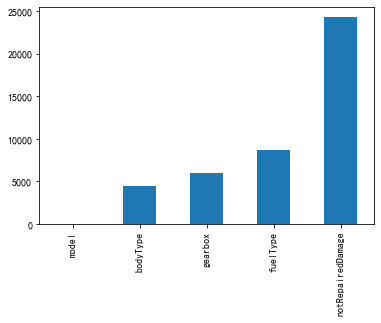

In [27]:
# nan可视化
missing = Train_df.isnull().sum()
missing = missing[missing > 0]  #series的索引
missing.sort_values(inplace=True)
missing.plot.bar()

In [28]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  41969 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

## 接下来人为区别分类和数值变量

In [29]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

<font color =red>分类变量实际上就是分为有序还是无序的问题</font>

**1、两类模型**

（1）数值大小有意义；（2）数值大小无意义，只在乎顺序

虽然大多数模型要求输入项是数值型变量，但其对数值的处理方式是完全不同的。有些模型的损失函数对数值大小是敏感的，即变量间的数值大小本身是有比较意义的，<font color =red>如逻辑回归，SVM等</font>，我们暂将其称为A类模型；有些模型本身对数值变化不敏感，数值存在的意义更多的是为了排序，即0.1,0.2,0.3与1,2,3是没有区别的，<font color =red>这部分模型绝大部分是树模型，暂将其称为B类模型。</font>

**2、两类类别变量**

类别变量再细分可以分成有序变量和无序变量，典型的有序变量就是学历，如博士研究生，硕士研究生，本科生等在业务含义上本身是有高低之分的。而无序变量在业务含义上是无序的，如品牌等。

**label encoding和one hot encoding是将类别变量转换为数值变量常用的两种方法**

- label encoding是将类别变量中每一类别赋一数值，从而转换成数值型。比如有一列 [dog,cat,dog,mouse,cat]，我们把其转换为[1,2,1,3,2]。这里就产生了一个奇怪的现象：dog和mouse的平均值是cat，所以label encoding最直观的缺点就是赋值难以解释，适用场景更窄。
<br\>
- one hot encoding的优点就是它的值只有0/1，不同的类型存储在垂直的空间。缺点就是，当类别的数量很多时，特征空间会变得非常大。

In [3]:
#人为分出的数值型变量和分类型变量

#这边已经删除了三列SaleID，seller ，offerType。seller和offerType这两列数据严重倾斜。

numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
datetime_features=['regDate','creatDate']

In [31]:
Train_df.nunique()

SaleID               150000
name                  99662
regDate                3894
model                   248
brand                    40
bodyType                  8
fuelType                  7
gearbox                   2
power                   566
kilometer                13
notRepairedDamage         2
regionCode             7905
seller                    2
offerType                 1
creatDate                96
price                  3763
v_0                  143997
v_1                  143998
v_2                  143997
v_3                  143998
v_4                  143998
v_5                  139624
v_6                  109766
v_7                  138709
v_8                  142451
v_9                  140617
v_10                 143997
v_11                 143997
v_12                 143997
v_13                 143998
v_14                 143998
dtype: int64

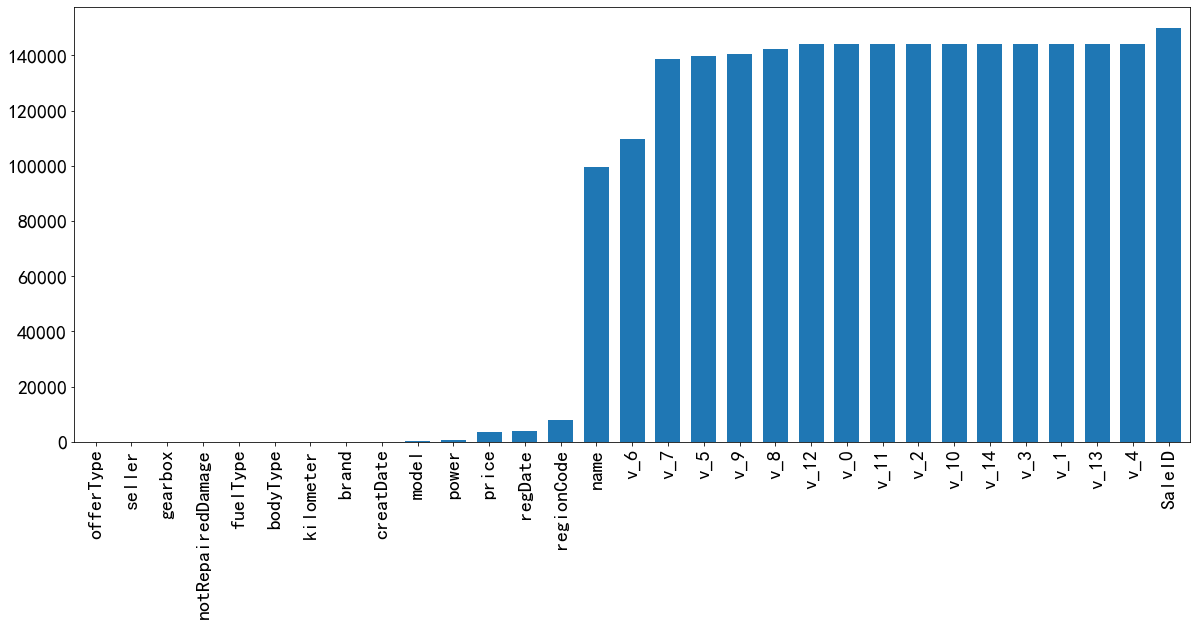

In [32]:
plt.rcParams['figure.figsize'] = (20.0, 8.0) # 单位是inches（设置显示图片的大小）

Train_df.nunique().sort_values().plot.bar(width=0.7,fontsize =20)#fontsize设置横纵轴字体大小

In [33]:
#列表的append操作很神奇，必须再次打印numeric_features才显示新的列表，直接numeric_features.append('deacav')不显示任何值，会返回None
#d=numeric_features.append('deacav')
#print(d)

In [4]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

## 了解预测值分布

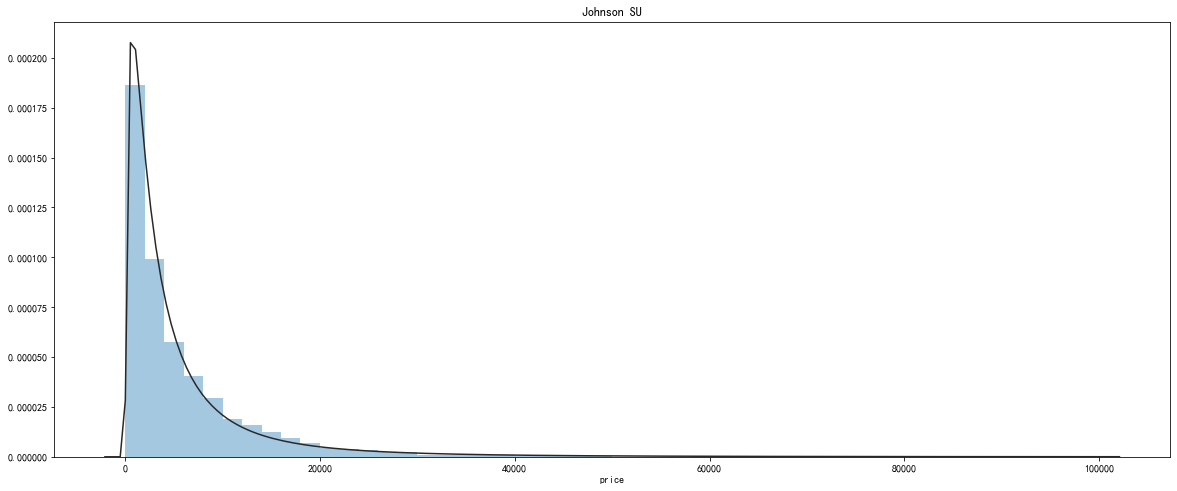

In [35]:
import scipy.stats as st
y = Train_df['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

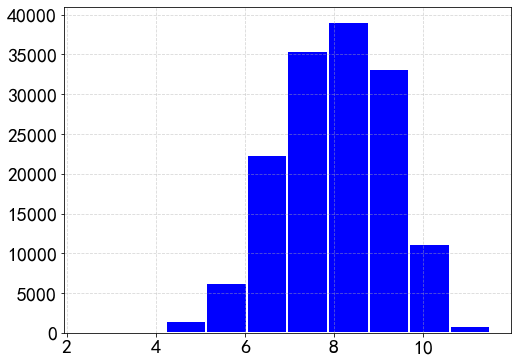

In [36]:
plt.figure(figsize=[8,6])
plt.hist(np.log(Train_df['price']), orientation = 'vertical',histtype = 'bar', color ='blue',edgecolor='white',linewidth=2)
                                                                                                #还有两个重要参数
                                                                                                #edgecolor='white',linewidth=2
                                                                                                 #分别表示各个柱状图边界的颜色和宽度
plt.grid(True,linestyle='--', alpha=0.5)     #这个表示画图的时候画网格线    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 查看分类变量和price的相关性

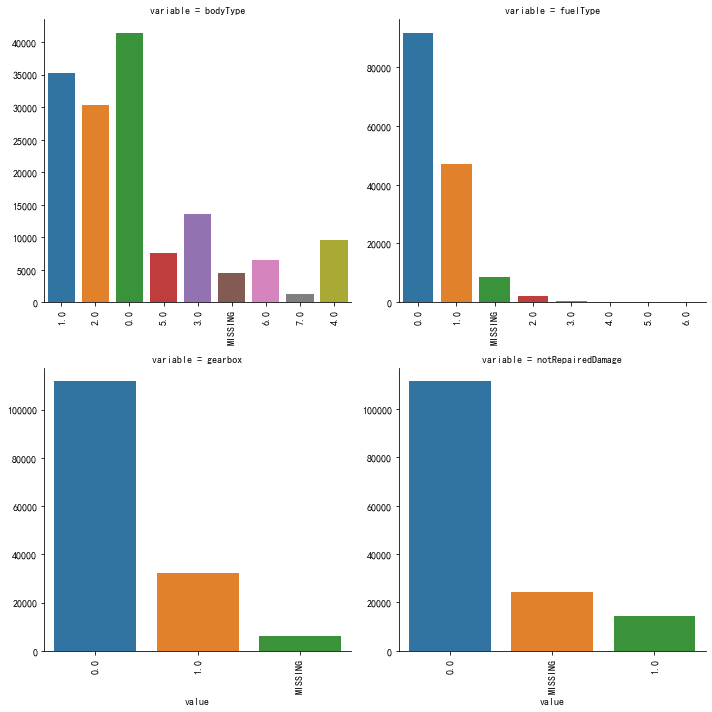

In [37]:
categorical_features_ = [
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features_:
    Train_df[c] = Train_df[c].astype('category')
    if Train_df[c].isnull().any():
        Train_df[c] = Train_df[c].cat.add_categories(['MISSING'])
        Train_df[c] = Train_df[c].fillna('MISSING')
        
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_df,  value_vars=categorical_features_)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(count_plot, "value")

In [38]:
##  unique分布
for fea in categorical_features:
    print(fea,Train_df[fea].nunique())

name 99662
model 248
brand 40
bodyType 9
fuelType 8
gearbox 3
notRepairedDamage 3
regionCode 7905


In [39]:
#已经生成报告了，这边不再运行了，后面有需求，在运行吧（实在时间太长了）
#import pandas_profiling
#pfr = pandas_profiling.ProfileReport(Train_df)
#pfr.to_file("./example.html")

In [40]:
Train_df[['notRepairedDamage', 'price']].groupby(['notRepairedDamage'], as_index=False).mean().sort_values(by='price', ascending=False)

,notRepairedDamage,price
0,0.0,6979.776978
2,MISSING,3227.800937
1,1.0,2285.094377


In [41]:
Train_df[['gearbox', 'price']].groupby(['gearbox'], as_index=False).mean().sort_values(by='price', ascending=False)

,gearbox,price
1,1,10645.259878
0,0,4704.034124
2,MISSING,3102.635011


In [42]:
Train_df[['seller', 'price']].groupby(['seller'], as_index=False).var().sort_values(by='price', ascending=False)

,seller,price
0,0,5.628013e+07
1,1,NaN


In [43]:
for col in categorical_features:
    print(col)
    print(Train_df[col].value_counts())

name
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
bodyType
0.0        41420
1.0        35272
2.0        30324
3.0        13491
4.

In [44]:
print('offerType\n',Train_df['offerType'].value_counts())
print('\n')
print('seller\n',Train_df['seller'].value_counts())

offerType
 0    150000
Name: offerType, dtype: int64


seller
 0    149999
1         1
Name: seller, dtype: int64


根据上面的查看可以看出，offerType和seller数据严重倾斜，几乎就只有一种类型，所以其实可以考虑删除了。

In [45]:
Train_df = pd.read_csv('used_car_train.csv')
l_=Train_df[['bodyType', 'price']].groupby(['bodyType'], as_index=False).mean().sort_values(by='price', ascending=False)

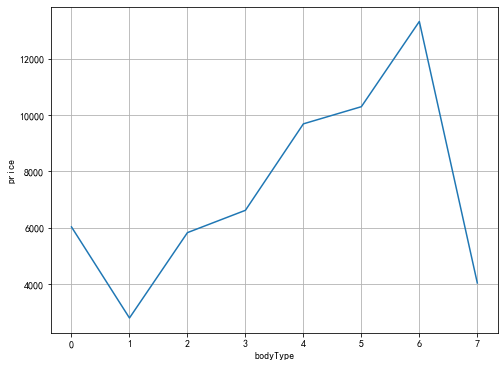

In [46]:
plt.figure(figsize=[8,6])
plt.grid()
sns.lineplot(x='bodyType',y='price',data=l_,markers=True,dashes=False)

In [47]:
f_=Train_df[['fuelType', 'price']].groupby(['fuelType'], as_index=False).mean().sort_values(by='price', ascending=False)

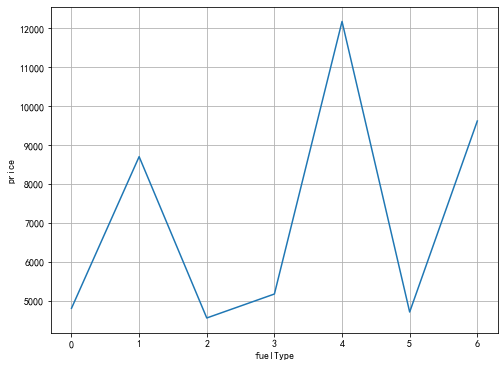

In [48]:
plt.figure(figsize=[8,6])
plt.grid()
sns.lineplot(x='fuelType',y='price',data=f_,markers=True,dashes=False)

## 数值变量分析

In [5]:
price_numeric = Train_df[numeric_features]
correlation = price_numeric.corr()
correlation

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
power,1.000000,-0.019631,0.215028,0.023746,-0.031487,-0.185342,-0.141013,0.119727,0.025648,-0.060397,0.155956,-0.140203,-0.092717,-0.122107,0.161990,-0.103430,-0.023808,0.219834
kilometer,-0.019631,1.000000,-0.225034,-0.022228,-0.110375,0.402502,-0.214861,0.049502,-0.024664,-0.017835,-0.407686,-0.149422,0.083358,0.066542,-0.370153,-0.285158,-0.120389,-0.440519
v_0,0.215028,-0.225034,1.000000,0.245049,-0.452591,-0.710480,-0.259714,0.726250,0.243783,-0.584363,0.514149,-0.186243,-0.582943,-0.667809,0.415711,-0.136938,-0.039809,0.628397
v_1,0.023746,-0.022228,0.245049,1.000000,-0.001133,-0.001915,-0.000468,0.109303,0.999415,-0.110806,-0.298966,-0.007698,-0.921904,0.370445,-0.087593,0.017349,0.002143,0.060914
v_2,-0.031487,-0.110375,-0.452591,-0.001133,1.000000,0.001224,-0.001021,-0.921857,0.023877,0.973689,0.180285,-0.236164,0.274341,0.800915,0.535270,-0.055376,-0.013785,0.085322
v_3,-0.185342,0.402502,-0.710480,-0.001915,0.001224,1.000000,-0.001694,-0.233412,-0.000747,0.191278,-0.933161,0.079292,0.247385,0.429777,-0.811301,-0.246052,-0.058561,-0.730946
v_4,-0.141013,-0.214861,-0.259714,-0.000468,-0.001021,-0.001694,1.000000,-0.259739,-0.011275,-0.054241,0.051741,0.962928,0.071116,0.110660,-0.134611,0.934580,-0.178518,-0.147085
v_5,0.119727,0.049502,0.726250,0.109303,-0.921857,-0.233412,-0.259739,1.000000,0.091229,-0.939385,0.010686,-0.050343,-0.440588,-0.845954,-0.258521,-0.162689,0.037804,0.164317
v_6,0.025648,-0.024664,0.243783,0.999415,0.023877,-0.000747,-0.011275,0.091229,1.000000,-0.085410,-0.294956,-0.023057,-0.917056,0.386446,-0.070238,0.000758,-0.003322,0.068970
v_7,-0.060397,-0.017835,-0.584363,-0.110806,0.973689,0.191278,-0.054241,-0.939385,-0.085410,1.000000,0.028695,-0.264091,0.410014,0.813175,0.385378,-0.154535,-0.020218,-0.053024


In [50]:
correlation['price']

power        0.219834
kilometer   -0.440519
v_0          0.628397
v_1          0.060914
v_2          0.085322
v_3         -0.730946
v_4         -0.147085
v_5          0.164317
v_6          0.068970
v_7         -0.053024
v_8          0.685798
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
v_12         0.692823
v_13        -0.013993
v_14         0.035911
price        1.000000
Name: price, dtype: float64

In [51]:
##  数字特征相互之间的关系可视化
'''
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_df[columns],height = 2.5 ,kind ='scatter',diag_kind='kde')
plt.show()
'''

"\nsns.set()\ncolumns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']\nsns.pairplot(Train_df[columns],height = 2.5 ,kind ='scatter',diag_kind='kde')\nplt.show()\n"

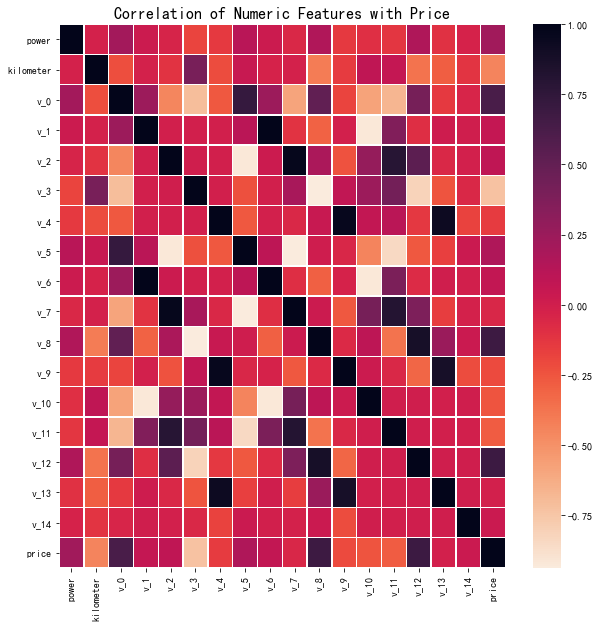

In [17]:
#这边热力图的画法有两种，一种是把相关系数全部转化为正数，只看他们的相关性强度，第二种就是用原始相关系数，能看出正相关还是负相关
price_numeric = Train_df[numeric_features]
correlation = price_numeric.corr()#这边依然生成df
f , ax = plt.subplots(figsize = (10, 10))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,linewidths=0.5,cmap=sns.cm.rocket_r)

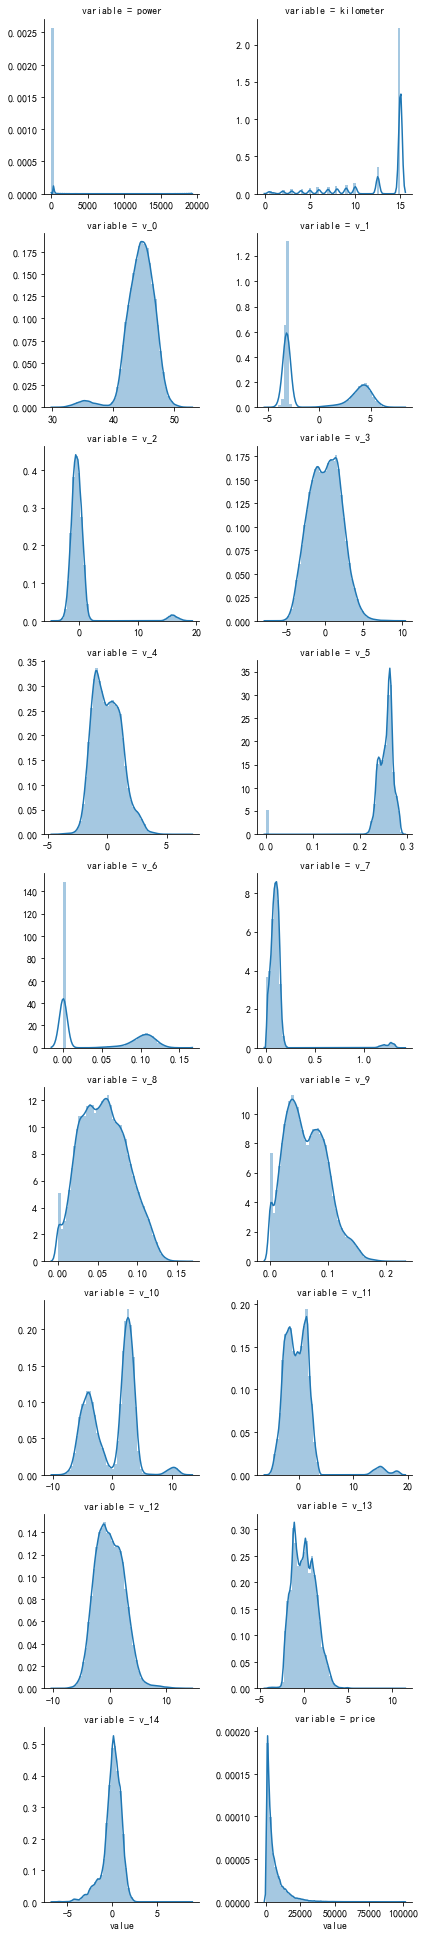

In [53]:
f = pd.melt(Train_df, value_vars=numeric_features) #这边的操作就是把所有的数字特征列的值全部汇总到一列上面
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
                                                      #不共享x和y轴
    
g = g.map(sns.distplot, "value")#distplot画直方图和密度图的结合，直方图横轴就是连续区间，纵轴就是每个区间分别有多少个值。

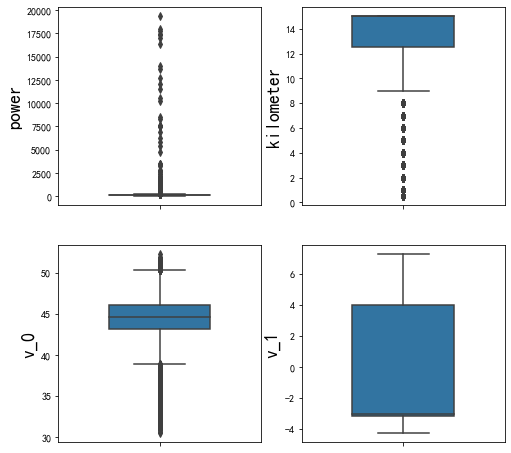

In [54]:
# 画箱式图
column = numeric_features[:4]  # 列表头
fig = plt.figure(figsize=(8, 8))  # 指定绘图对象宽度和高度
for i in range(4):
    plt.subplot(2, 2, i + 1)  # 2行2列子图
    sns.boxplot(y=Train_df[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=18)
plt.show()

In [55]:
'''
for col in numeric_features:
    print(col)
    print(Train_df[col].value_counts())
'''

'\nfor col in numeric_features:\n    print(col)\n    print(Train_df[col].value_counts())\n'

In [56]:
Train_df['power'].value_counts().loc[Train_df['power'].value_counts()<10].sort_index(ascending=False)

19312    1
17932    1
17700    1
17410    1
17322    1
        ..
6        5
4        9
3        3
2        3
1        8
Name: power, Length: 305, dtype: int64

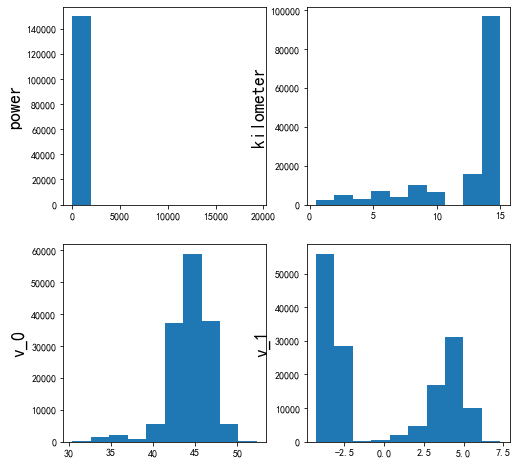

In [57]:
column = numeric_features[:4]  # 列表头
fig = plt.figure(figsize=(8, 8))  # 指定绘图对象宽度和高度
for i in range(4):
    plt.subplot(2, 2, i + 1)  # 2行2列子图
    plt.hist(Train_df[column[i]])  # 直方图
    plt.ylabel(column[i], fontsize=18)
plt.show()

In [58]:
Train_df['power'].value_counts().sort_index()

0        12829
1            8
2            3
3            3
4            9
         ...  
17322        1
17410        1
17700        1
17932        1
19312        1
Name: power, Length: 566, dtype: int64

In [59]:
Train_df['power'].describe(percentiles=[.8,.99])

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
50%         110.000000
80%         163.000000
99%         340.000000
max       19312.000000
Name: power, dtype: float64

# 特征工程

## 删除异常值

In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline

In [61]:
Train_data = pd.read_csv('used_car_train.csv')
Test_data = pd.read_csv('used_car_test.csv')
print(Train_data.shape)
print(Test_data.shape)

(150000, 31)
(50000, 30)


In [62]:
#Train_data['train']=1
#Test_data['train']=0
#data = pd.concat([Train_data, Test_data], ignore_index=True)

In [63]:
#type_=(Train_data['power']>100)
#type_1=(Train_data['power']<100)
#(type_,type_1)

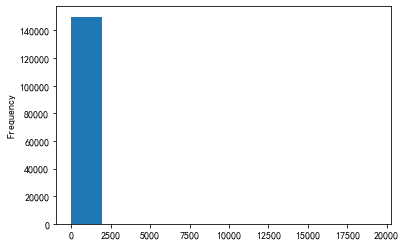

In [64]:
Train_data['power'].plot.hist()

In [65]:
#data['power'].plot.hist()

In [66]:
# 处理异常值函数
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr#用于判断是否是极端数据点的标准
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)#这边是判断极端异常点的，复习数据分析—入门到进阶 书P325
        rule_up = (data_ser > val_up)#rule返回的是bool类型的数据，仍然是series
        return (rule_low, rule_up), (val_low, val_up)#返回两个元组

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]#要删除的索引行
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)                               #删除power有异常值的行
    data_n.reset_index(drop=True, inplace=True)              #重置索引
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


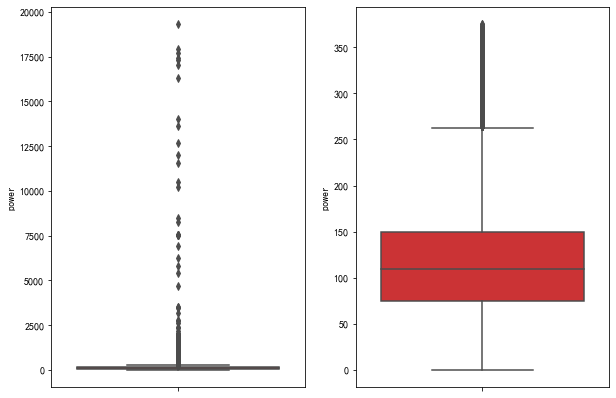

In [67]:
# 可以删掉一些异常数据，根据前面的数据分析，异常数据主要集中在power列。  
#后续考虑一下是否需要删除test测试集中的异常值
Train_data = outliers_proc(Train_data, 'power', scale=3)

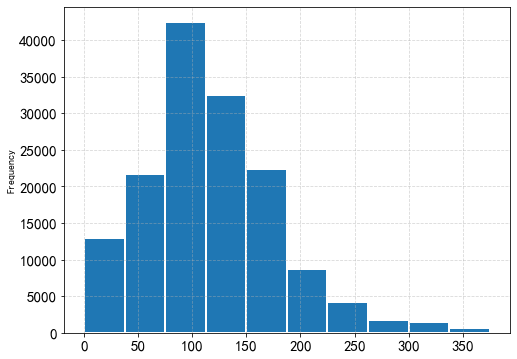

In [68]:
plt.figure(figsize=[8,6])
#这边用train_data和data都跑一遍
Train_data['power'].plot.hist(edgecolor='white',linewidth=2)
plt.grid(True,linestyle='--', alpha=0.5)     #画图的时候画网格线    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 填充缺失值

In [69]:
#data = pd.concat([Train_data, Test_data], ignore_index=True)

In [70]:
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4494
fuelType             8632
gearbox              5954
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [71]:
Train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [72]:
fillna_features = ['model','bodyType','fuelType','gearbox','notRepairedDamage']

In [73]:
# 分类特征使用众数填充
for i in fillna_features:
    Train_data[i] = Train_data[i].fillna(Train_data[i].mode()[0])
Train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,20000607,121.0,10,4.0,0.0,1.0,...,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149033,149996,184535,20091102,116.0,11,0.0,0.0,0.0,...,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149034,149997,147587,20101003,60.0,11,1.0,1.0,0.0,...,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149035,149998,45907,20060312,34.0,10,3.0,1.0,0.0,...,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [74]:
Train_data.isnull().sum()

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

## 特征构造

In [75]:
'''
#SaleID肯定没用，但是我们可以用来统计别的特征的group数量
#name一般没什么好挖掘的，不过同名的好像不少，可以挖掘一下
Train_data['name_count'] = Train_data.groupby(['name'])['SaleID'].transform('count')#统计同名称的个数
'''

"\n#SaleID肯定没用，但是我们可以用来统计别的特征的group数量\n#name一般没什么好挖掘的，不过同名的好像不少，可以挖掘一下\nTrain_data['name_count'] = Train_data.groupby(['name'])['SaleID'].transform('count')#统计同名称的个数\n"

In [76]:
'''
#特征工程处理
## 1、时间，地区

#时间
from datetime import datetime
#下面这个函数就是把所有的数值日期转换为YYYY-MM-DD的形式
def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])

    if month < 1:
        month = 1

    date = datetime(year, month, day)
    return date

Train_data['regDate'] = Train_data['regDate'].apply(date_process)
Train_data['creatDate'] = Train_data['creatDate'].apply(date_process)
Train_data['regDate_year'] = Train_data['regDate'].dt.year
Train_data['regDate_month'] = Train_data['regDate'].dt.month
Train_data['regDate_day'] = Train_data['regDate'].dt.day
Train_data['creatDate_year'] = Train_data['creatDate'].dt.year
Train_data['creatDate_month'] = Train_data['creatDate'].dt.month
Train_data['creatDate_day'] = Train_data['creatDate'].dt.day
Train_data['car_age_day'] = (Train_data['creatDate'] - Train_data['regDate']).dt.days
Train_data['car_age_year'] = round(Train_data['car_age_day'] / 365, 1)


#地区
Train_data['regionCode_count'] = Train_data.groupby(['regionCode'])['SaleID'].transform('count')
Train_data['city'] = Train_data['regionCode'].apply(lambda x : str(x)[:2])
'''

"\n#特征工程处理\n## 1、时间，地区\n\n#时间\nfrom datetime import datetime\n#下面这个函数就是把所有的数值日期转换为YYYY-MM-DD的形式\ndef date_process(x):\n    year = int(str(x)[:4])\n    month = int(str(x)[4:6])\n    day = int(str(x)[6:8])\n\n    if month < 1:\n        month = 1\n\n    date = datetime(year, month, day)\n    return date\n\nTrain_data['regDate'] = Train_data['regDate'].apply(date_process)\nTrain_data['creatDate'] = Train_data['creatDate'].apply(date_process)\nTrain_data['regDate_year'] = Train_data['regDate'].dt.year\nTrain_data['regDate_month'] = Train_data['regDate'].dt.month\nTrain_data['regDate_day'] = Train_data['regDate'].dt.day\nTrain_data['creatDate_year'] = Train_data['creatDate'].dt.year\nTrain_data['creatDate_month'] = Train_data['creatDate'].dt.month\nTrain_data['creatDate_day'] = Train_data['creatDate'].dt.day\nTrain_data['car_age_day'] = (Train_data['creatDate'] - Train_data['regDate']).dt.days\nTrain_data['car_age_year'] = round(Train_data['car_age_day'] / 365, 1)\n\n\n#地区\nTrain_data['regio

In [77]:
'''
# 测试分类特征与price时，发现有点效果，立马对model进行处理
kk = "regionCode"
Train_gb = Train_data.groupby(kk)
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['car_age_day'] > 0]
    info[kk+'_days_max'] = kind_data.car_age_day.max()
    info[kk+'_days_min'] = kind_data.car_age_day.min()
    info[kk+'_days_std'] = kind_data.car_age_day.std()
    info[kk+'_days_mean'] = kind_data.car_age_day.mean()
    info[kk+'_days_median'] = kind_data.car_age_day.median()
    info[kk+'_days_sum'] = kind_data.car_age_day.sum()
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": kk})
Train_data = Train_data.merge(brand_fe, how='left', on=kk)

Train_gb = Train_data.groupby(kk)
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['power'] > 0]
    info[kk+'_power_max'] = kind_data.power.max()
    info[kk+'_power_min'] = kind_data.power.min()
    info[kk+'_power_std'] = kind_data.power.std()
    info[kk+'_power_mean'] = kind_data.power.mean()
    info[kk+'_power_median'] = kind_data.power.median()
    info[kk+'_power_sum'] = kind_data.power.sum()
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": kk})
Train_data = Train_data.merge(brand_fe, how='left', on=kk)
Train_data
'''

'\n# 测试分类特征与price时，发现有点效果，立马对model进行处理\nkk = "regionCode"\nTrain_gb = Train_data.groupby(kk)\nall_info = {}\nfor kind, kind_data in Train_gb:\n    info = {}\n    kind_data = kind_data[kind_data[\'car_age_day\'] > 0]\n    info[kk+\'_days_max\'] = kind_data.car_age_day.max()\n    info[kk+\'_days_min\'] = kind_data.car_age_day.min()\n    info[kk+\'_days_std\'] = kind_data.car_age_day.std()\n    info[kk+\'_days_mean\'] = kind_data.car_age_day.mean()\n    info[kk+\'_days_median\'] = kind_data.car_age_day.median()\n    info[kk+\'_days_sum\'] = kind_data.car_age_day.sum()\n    all_info[kind] = info\nbrand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": kk})\nTrain_data = Train_data.merge(brand_fe, how=\'left\', on=kk)\n\nTrain_gb = Train_data.groupby(kk)\nall_info = {}\nfor kind, kind_data in Train_gb:\n    info = {}\n    kind_data = kind_data[kind_data[\'power\'] > 0]\n    info[kk+\'_power_max\'] = kind_data.power.max()\n    info[kk+\'_power_min\'] = kind_data.power.min(

In [78]:
#Train_data['train']=1
#Test_data['train']=0
#data = pd.concat([Train_data, Test_data], ignore_index=True)
#使用时间
Train_data['used_time'] = (pd.to_datetime(Train_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                           pd.to_datetime(Train_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
#提取城市信息
Train_data['city'] = Train_data['regionCode'].apply(lambda x : str(x)[:-3])
Train_data = Train_data
#各品牌销量特征构造
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
Train_data = Train_data.merge(brand_fe, how='left', on='brand')


In [79]:
# model统计量特征
Train_gm = Train_data.groupby("model")
all_info = {}
for kind, kind_data in Train_gm:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    # 这项统计数据用在test数据集不适合,因为这是train数据集的统计值
    info['model_amount'] = len(kind_data) 
    info['model_price_max'] = kind_data.price.max()
    info['model_price_median'] = kind_data.price.median()
    info['model_price_min'] = kind_data.price.min()
    info['model_price_sum'] = kind_data.price.sum()
    info['model_price_std'] = kind_data.price.std()
    info['model_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
model_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "model"})
# 在计算model_price_std时出现nan, 当model=247时，只有一条记录，所以model_price_std=nan
# 需要对0进行填充，不然在训练模型的时候会出错
model_fe = model_fe.fillna(0)
Train_data = Train_data.merge(model_fe, how='left', on='model')
Train_data


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,...,brand_price_average,model_amount,model_price_max,model_price_median,model_price_min,model_price_sum,model_price_std,model_price_average
0,0,736,20040402,30.0,6,1.0,0.0,0.0,...,3576.37,2341.0,18600.0,1600.0,30.0,6444245.0,3012.050851,2751.60
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,...,9082.86,4496.0,46900.0,4900.0,15.0,30664080.0,6343.159417,6818.79
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,...,9851.83,927.0,45000.0,9700.0,100.0,10112424.0,5872.487112,10897.01
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,...,8076.76,335.0,74630.0,7000.0,58.0,3700754.0,10562.987281,11014.15
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,...,3305.67,543.0,8900.0,890.0,30.0,860896.0,1532.239793,1582.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,20000607,121.0,10,4.0,0.0,1.0,...,8076.76,807.0,33250.0,5700.0,499.0,5387473.0,4599.882725,6667.66
149033,149996,184535,20091102,116.0,11,0.0,0.0,0.0,...,4549.41,598.0,29999.0,6200.0,305.0,4805401.0,5878.064741,8022.37
149034,149997,147587,20101003,60.0,11,1.0,1.0,0.0,...,4549.41,1177.0,20000.0,2790.0,45.0,4504052.0,3240.489728,3823.47
149035,149998,45907,20060312,34.0,10,3.0,1.0,0.0,...,8076.76,312.0,31000.0,4850.0,200.0,2002585.0,4889.409448,6398.04


In [80]:
Train_data.isnull().sum()

SaleID                     0
name                       0
regDate                    0
model                      0
brand                      0
bodyType                   0
fuelType                   0
gearbox                    0
power                      0
kilometer                  0
notRepairedDamage          0
regionCode                 0
seller                     0
offerType                  0
creatDate                  0
price                      0
v_0                        0
v_1                        0
v_2                        0
v_3                        0
v_4                        0
v_5                        0
v_6                        0
v_7                        0
v_8                        0
v_9                        0
v_10                       0
v_11                       0
v_12                       0
v_13                       0
v_14                       0
used_time              11318
city                       0
brand_amount               0
brand_price_ma

In [81]:
Train_data['power'].value_counts().sort_values(ascending=False)

0      12829
75      9593
150     6495
60      6374
140     5963
       ...  
14         1
293        1
36         1
35         1
153        1
Name: power, Length: 352, dtype: int64

In [82]:
#data.loc[data['power']<=350,'power']

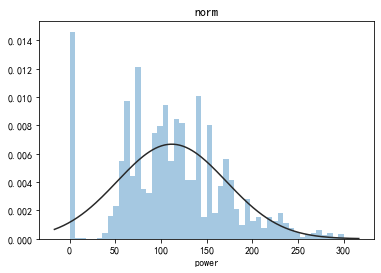

In [83]:
import scipy.stats as st
plt.figure(1); plt.title('norm')
sns.distplot(Train_data.loc[Train_data['power']<=300,'power'], kde=False, fit=st.norm)

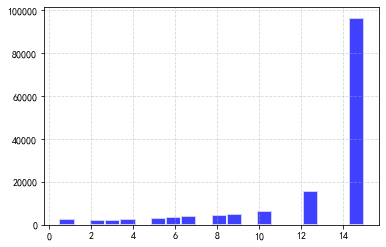

In [84]:
plt.hist(Train_data['kilometer'],bins=20,orientation = 'vertical',histtype = 'bar',color='blue',alpha=0.75,edgecolor='white',linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

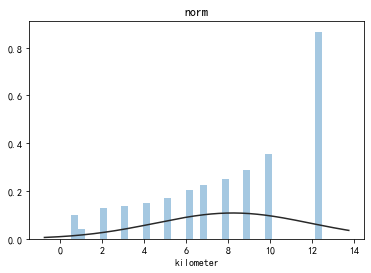

In [85]:
plt.figure(1); plt.title('norm')
sns.distplot(Train_data.loc[Train_data['kilometer']<=14,'kilometer'], kde=False, fit=st.norm)

In [86]:
Train_data['power'].describe(percentiles=[.8,.99])

count    149037.000000
mean        114.615686
std          64.189762
min           0.000000
50%         109.000000
80%         163.000000
99%         306.000000
max         375.000000
Name: power, dtype: float64

In [87]:
#因为power数据分布极不均匀，所以这边分箱操作只包括0-300以内的数字
#简单查看了一下每个箱子与price的关系，呈现出明显的正比趋势，即箱子越大，price越大，所以可以用power_bin来代替power，
#由此将数值型变量转为构成一个分类有序变量
bin = [i*10 for i in range(31)]
Train_data['power_bin'] = pd.cut(Train_data['power'], bin, labels=False)
Train_data[['power_bin', 'price']].groupby(['power_bin'], as_index=False).mean().sort_values(by='power_bin', ascending=True)

,power_bin,price
0,0.0,3482.025000
1,1.0,4218.375000
2,2.0,2252.294118
3,3.0,818.631336
4,4.0,1098.966964
5,5.0,1504.605360
6,6.0,3300.931636
7,7.0,2500.710071
8,8.0,3617.515527
9,9.0,4130.974571


In [88]:
'''
bin = [i*10 for i in range(24)]
Train_data['model_bin'] = pd.cut(Train_data['model'], bin, labels=False)
Train_data[['model_bin', 'price']].groupby(['model_bin'], as_index=False).mean().sort_values(by='model_bin', ascending=True)
'''

"\nbin = [i*10 for i in range(24)]\nTrain_data['model_bin'] = pd.cut(Train_data['model'], bin, labels=False)\nTrain_data[['model_bin', 'price']].groupby(['model_bin'], as_index=False).mean().sort_values(by='model_bin', ascending=True)\n"

In [89]:
'''
#power列数据分桶
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()
'''
# 删除不需要的数据
Train_data = Train_data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)
Train_data

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,...,model_amount,model_price_max,model_price_median,model_price_min,model_price_sum,model_price_std,model_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,...,2341.0,18600.0,1600.0,30.0,6444245.0,3012.050851,2751.60,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0,...,4496.0,46900.0,4900.0,15.0,30664080.0,6343.159417,6818.79,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,163,...,927.0,45000.0,9700.0,100.0,10112424.0,5872.487112,10897.01,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,193,...,335.0,74630.0,7000.0,58.0,3700754.0,10562.987281,11014.15,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,68,...,543.0,8900.0,890.0,30.0,860896.0,1532.239793,1582.53,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,121.0,10,4.0,0.0,1.0,163,...,807.0,33250.0,5700.0,499.0,5387473.0,4599.882725,6667.66,16.0
149033,149996,184535,116.0,11,0.0,0.0,0.0,125,...,598.0,29999.0,6200.0,305.0,4805401.0,5878.064741,8022.37,12.0
149034,149997,147587,60.0,11,1.0,1.0,0.0,90,...,1177.0,20000.0,2790.0,45.0,4504052.0,3240.489728,3823.47,8.0
149035,149998,45907,34.0,10,3.0,1.0,0.0,156,...,312.0,31000.0,4850.0,200.0,2002585.0,4889.409448,6398.04,15.0


In [90]:
Train_data.isnull().sum()

SaleID                     0
name                       0
model                      0
brand                      0
bodyType                   0
fuelType                   0
gearbox                    0
power                      0
kilometer                  0
notRepairedDamage          0
seller                     0
offerType                  0
price                      0
v_0                        0
v_1                        0
v_2                        0
v_3                        0
v_4                        0
v_5                        0
v_6                        0
v_7                        0
v_8                        0
v_9                        0
v_10                       0
v_11                       0
v_12                       0
v_13                       0
v_14                       0
used_time              11318
city                       0
brand_amount               0
brand_price_max            0
brand_price_median         0
brand_price_min            0
brand_price_su

## 数值特征归一化和分类特征one-hot编码

### 数值特征归一化

In [91]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [92]:
#Train_data['city']=Train_data['city'].astype('int')

In [93]:
# 归一化函数
def max_min(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [94]:
numeric_features = numeric_features +['brand_price_max','brand_price_median','brand_price_min','brand_price_sum','brand_price_std','brand_price_average']+['model_price_max','model_price_median','model_price_min','model_price_sum','model_price_std','model_price_average']
for num_fea in numeric_features:
    Train_data[num_fea] = max_min(Train_data[num_fea])

### 分类特征one-hot编码

In [95]:
#cate_oht_features = ['bodyType', 'fuelType','gearbox', 'notRepairedDamage', 'power_bin','city']  

In [96]:
#Train_data = pd.get_dummies(Train_data, columns=['model', 'brand', 'bodyType', 'fuelType',
#                                     'gearbox', 'notRepairedDamage', 'power_bin'])

### 增加交互特征

In [97]:
'''
# 第三批特征工程
for i in range(15):
    Train_data['new' + str(i) + '*power'] = Train_data['v_' + str(i)] * Train_data['power']

for i in range(15):
    Train_data['new' + str(i) + '*day'] = Train_data['v_' + str(i)] * Train_data['car_age_day']

for i in range(15):
    Train_data['new' + str(i) + '*year'] = Train_data['v_' + str(i)] * Train_data['car_age_year']
'''

"\n# 第三批特征工程\nfor i in range(15):\n    Train_data['new' + str(i) + '*power'] = Train_data['v_' + str(i)] * Train_data['power']\n\nfor i in range(15):\n    Train_data['new' + str(i) + '*day'] = Train_data['v_' + str(i)] * Train_data['car_age_day']\n\nfor i in range(15):\n    Train_data['new' + str(i) + '*year'] = Train_data['v_' + str(i)] * Train_data['car_age_year']\n"

In [98]:
print(Train_data.shape)
Train_data.columns

(149037, 45)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'used_time', 'city',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'model_amount', 'model_price_max',
       'model_price_median', 'model_price_min', 'model_price_sum',
       'model_price_std', 'model_price_average', 'power_bin'],
      dtype='object')

In [99]:
#Train_data.to_csv('Train_data_clear.csv',index=0)

# 模型构建

In [100]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 导入数据

In [101]:
Train_data_clear=pd.read_csv('Train_data_clear.csv')
Train_data_clear

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,...,model_amount,model_price_max,model_price_median,model_price_min,model_price_sum,model_price_std,model_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,0.160000,...,2341.0,0.177788,0.025882,0.001001,0.106174,0.146296,0.051233,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0.000000,...,4496.0,0.463646,0.103529,0.000211,0.505306,0.308089,0.143764,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,0.434667,...,927.0,0.444455,0.216471,0.004687,0.166624,0.285228,0.236545,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,0.514667,...,335.0,0.743747,0.152941,0.002475,0.060962,0.513047,0.239210,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,0.181333,...,543.0,0.079808,0.009176,0.001001,0.014162,0.074421,0.024636,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,121.0,10,4.0,0.0,1.0,0.434667,...,807.0,0.325768,0.122353,0.025699,0.088759,0.223417,0.140325,16.0
149033,149996,184535,116.0,11,0.0,0.0,0.0,0.333333,...,598.0,0.292929,0.134118,0.015483,0.079166,0.285499,0.171146,12.0
149034,149997,147587,60.0,11,1.0,1.0,0.0,0.240000,...,1177.0,0.191929,0.053882,0.001791,0.074200,0.157391,0.075618,8.0
149035,149998,45907,34.0,10,3.0,1.0,0.0,0.416000,...,312.0,0.303040,0.102353,0.009953,0.032977,0.237480,0.134191,15.0


In [102]:
Train_data_clear=Train_data_clear.dropna()
Train_data_clear

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,...,model_amount,model_price_max,model_price_median,model_price_min,model_price_sum,model_price_std,model_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,0.160000,...,2341.0,0.177788,0.025882,0.001001,0.106174,0.146296,0.051233,5.0
2,2,14874,115.0,15,1.0,0.0,0.0,0.434667,...,927.0,0.444455,0.216471,0.004687,0.166624,0.285228,0.236545,16.0
4,4,111080,110.0,5,1.0,0.0,0.0,0.181333,...,543.0,0.079808,0.009176,0.001001,0.014162,0.074421,0.024636,6.0
5,5,137642,24.0,10,0.0,1.0,0.0,0.290667,...,412.0,0.292929,0.195882,0.001527,0.071874,0.261137,0.228967,10.0
6,6,2402,13.0,4,0.0,0.0,1.0,0.400000,...,3744.0,0.505061,0.135294,0.000053,0.506041,0.358898,0.175185,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149031,149994,43073,42.0,1,1.0,0.0,0.0,0.325333,...,291.0,0.258596,0.324706,0.025752,0.069752,0.176521,0.318528,12.0
149032,149995,163978,121.0,10,4.0,0.0,1.0,0.434667,...,807.0,0.325768,0.122353,0.025699,0.088759,0.223417,0.140325,16.0
149033,149996,184535,116.0,11,0.0,0.0,0.0,0.333333,...,598.0,0.292929,0.134118,0.015483,0.079166,0.285499,0.171146,12.0
149034,149997,147587,60.0,11,1.0,1.0,0.0,0.240000,...,1177.0,0.191929,0.053882,0.001791,0.074200,0.157391,0.075618,8.0


In [103]:
Train_data_clear.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'used_time', 'city',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'model_amount', 'model_price_max',
       'model_price_median', 'model_price_min', 'model_price_sum',
       'model_price_std', 'model_price_average', 'power_bin'],
      dtype='object')

In [104]:
Train_data_clear.dtypes

SaleID                   int64
name                     int64
model                  float64
brand                    int64
bodyType               float64
fuelType               float64
gearbox                float64
power                  float64
kilometer              float64
notRepairedDamage      float64
seller                   int64
offerType                int64
price                    int64
v_0                    float64
v_1                    float64
v_2                    float64
v_3                    float64
v_4                    float64
v_5                    float64
v_6                    float64
v_7                    float64
v_8                    float64
v_9                    float64
v_10                   float64
v_11                   float64
v_12                   float64
v_13                   float64
v_14                   float64
used_time              float64
city                   float64
brand_amount           float64
brand_price_max        float64
brand_pr

In [105]:
Train_columns2=['brand', 'bodyType', 'fuelType', 'gearbox','kilometer', 'notRepairedDamage','v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'name_count','car_age_day', 'car_age_year',
       'regionCode_count', 'city', 'regionCode_days_max',
       'regionCode_days_min', 'regionCode_days_std', 'regionCode_days_mean',
       'regionCode_days_median', 'regionCode_days_sum', 'regionCode_power_max',
       'regionCode_power_min', 'regionCode_power_std', 'regionCode_power_mean',
       'regionCode_power_median', 'regionCode_power_sum', 'power_bin',
       'model_bin', 'new0*power', 'new1*power', 'new2*power', 'new3*power',
       'new4*power', 'new5*power', 'new6*power', 'new7*power', 'new8*power',
       'new9*power', 'new10*power', 'new11*power', 'new12*power',
       'new13*power', 'new14*power', 'new0*day', 'new1*day', 'new2*day',
       'new3*day', 'new4*day', 'new5*day', 'new6*day', 'new7*day', 'new8*day',
       'new9*day', 'new10*day', 'new11*day', 'new12*day', 'new13*day',
       'new14*day', 'new0*year', 'new1*year', 'new2*year', 'new3*year',
       'new4*year', 'new5*year', 'new6*year', 'new7*year', 'new8*year',
       'new9*year', 'new10*year', 'new11*year', 'new12*year', 'new13*year',
       'new14*year']
Train_columns=['bodyType', 'fuelType', 'gearbox',
        'kilometer', 'notRepairedDamage', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14','used_time', 'city',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'model_amount', 'model_price_max',
       'model_price_median', 'model_price_min', 'model_price_sum',
       'model_price_std', 'model_price_average', 'power_bin']
Train_column = [x for x in Train_data_clear.columns if x not in ['SaleID','name','regDate','regionCode','creatDate','model','brand','power','seller','offerType','price']]
train_x = Train_data_clear[Train_columns]
train_y=Train_data_clear['price']

In [106]:
train_x

,bodyType,fuelType,gearbox,kilometer,notRepairedDamage,v_0,v_1,v_2,...,model_amount,model_price_max,model_price_median,model_price_min,model_price_sum,model_price_std,model_price_average,power_bin
0,1.0,0.0,0.0,0.827586,0.0,0.590596,0.711261,0.192329,...,2341.0,0.177788,0.025882,0.001001,0.106174,0.146296,0.051233,5.0
2,1.0,0.0,0.0,0.827586,0.0,0.710518,0.785078,0.246327,...,927.0,0.444455,0.216471,0.004687,0.166624,0.285228,0.236545,16.0
4,1.0,0.0,0.0,0.310345,0.0,0.637535,0.544686,0.214533,...,543.0,0.079808,0.009176,0.001001,0.014162,0.074421,0.024636,6.0
5,0.0,1.0,0.0,0.655172,0.0,0.726297,0.091797,0.196854,...,412.0,0.292929,0.195882,0.001527,0.071874,0.261137,0.228967,10.0
6,0.0,0.0,1.0,1.000000,0.0,0.716283,0.793895,0.195012,...,3744.0,0.505061,0.135294,0.000053,0.506041,0.358898,0.175185,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149031,1.0,0.0,0.0,0.172414,0.0,0.759793,0.777286,0.268957,...,291.0,0.258596,0.324706,0.025752,0.069752,0.176521,0.318528,12.0
149032,4.0,0.0,1.0,1.000000,0.0,0.680232,0.099561,0.136176,...,807.0,0.325768,0.122353,0.025699,0.088759,0.223417,0.140325,16.0
149033,0.0,0.0,0.0,0.655172,0.0,0.710230,0.099159,0.189191,...,598.0,0.292929,0.134118,0.015483,0.079166,0.285499,0.171146,12.0
149034,1.0,1.0,0.0,0.379310,0.0,0.653550,0.102434,0.215523,...,1177.0,0.191929,0.053882,0.001791,0.074200,0.157391,0.075618,8.0


In [107]:
train_y

0          1850
2          6222
4          5200
5          8000
6          3500
          ...  
149031    14780
149032     5900
149033     9500
149034     7500
149035     4999
Name: price, Length: 96267, dtype: int64

In [108]:
train_x.isnull().sum()

bodyType               0
fuelType               0
gearbox                0
kilometer              0
notRepairedDamage      0
v_0                    0
v_1                    0
v_2                    0
v_3                    0
v_4                    0
v_5                    0
v_6                    0
v_7                    0
v_8                    0
v_9                    0
v_10                   0
v_11                   0
v_12                   0
v_13                   0
v_14                   0
used_time              0
city                   0
brand_amount           0
brand_price_max        0
brand_price_median     0
brand_price_min        0
brand_price_sum        0
brand_price_std        0
brand_price_average    0
model_amount           0
model_price_max        0
model_price_median     0
model_price_min        0
model_price_sum        0
model_price_std        0
model_price_average    0
power_bin              0
dtype: int64

In [109]:
#在之前对预测值的分布的测试中，属于无界约翰逊分布，因此这边对其做对数处理
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


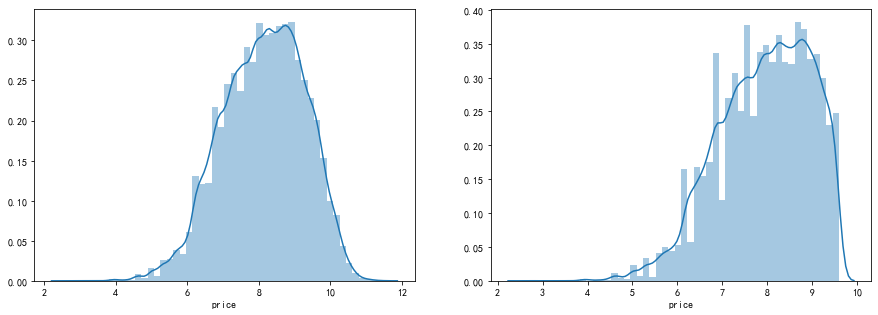

In [110]:
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

## 线性模型

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [112]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    #make_scorer是自定义函数，后面的得分末尾是score，则得分越高越好，如果是error，则得分越低越好
    scores = cross_val_score(model, X=train_x, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [114]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.190288,0.193661,0.440650
cv2,0.193954,0.196980,0.437916
cv3,0.193906,0.197078,0.442738
cv4,0.191450,0.194576,0.434396
cv5,0.195767,0.198953,0.442082


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y_ln, random_state=13)
lr=LinearRegression().fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train.astype('int'))))

Accuracy on training set: 0.700


In [116]:
y_predict=lr.predict(X_test)

In [117]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),np.expm1(y_predict))

933.0673666937105

In [118]:
sl_=pd.DataFrame([y_predict,y_test]).T
sl_

,0,1
0,6.472457,6.552508
1,8.435241,8.412055
2,8.003323,8.055475
3,7.886734,7.601402
4,6.855696,6.398595
...,...,...
24062,7.291829,7.601402
24063,7.979715,8.006701
24064,6.378294,6.746412
24065,6.796297,6.957497


intercept:9.264490782884344


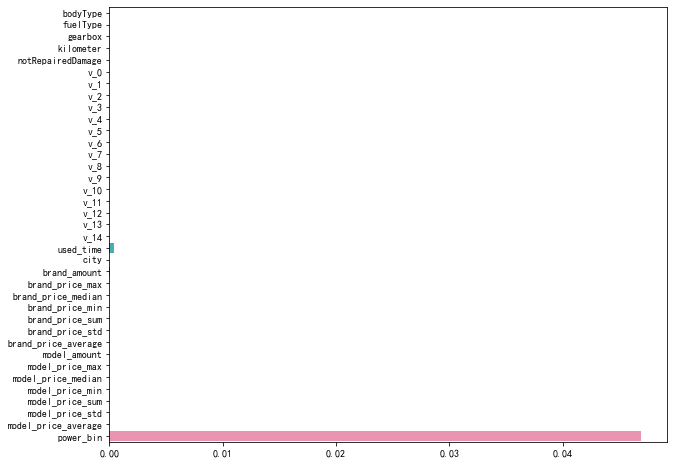

In [119]:
#Lasso回归是线性模型的正则化，L1正则化有助于特征选取
model = Lasso().fit(X_train,y_train)
print('intercept:'+ str(model.intercept_))
plt.figure(figsize=[10,8])
sns.barplot(abs(model.coef_), Train_columns)

## 非线性模型

In [120]:
#这边时间比较长
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y_ln, random_state=0)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.957


In [121]:
#时间太长了，有空再做吧
#scores = cross_val_score(RandomForestRegressor(), X=X_train, y=y_train.astype('int'), verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
#scores

In [122]:
#这个得分效果应该可以了
y_predict=forest.predict(X_test)
mean_absolute_error(np.expm1(y_test),np.expm1(y_predict))

646.2379385959816

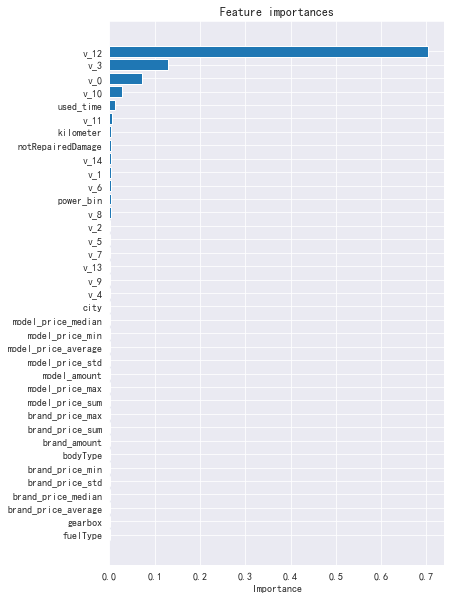

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(6,10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
plt.title('Feature importances')
plt.draw()
plt.show()

In [124]:
#scores = cross_val_score(RandomForestClassifier(), X=train_x, y=train_y_ln.astype('int'), verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
#scores

## 统计建模

In [125]:
import statsmodels.api as sm
#import statsmodels.regression.linear_model as sm
import pandas as pd

In [126]:

model = sm.OLS(y_train, X_train).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.862e+04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:02:36   Log-Likelihood:                -13613.
No. Observations:               72200   AIC:                         2.730e+04
Df Residuals:                   72163   BIC:                         2.764e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bodyType                0.0054    

In [127]:
y_predict=model.predict(X_test)

In [128]:
y_predict-y_test

17728    -0.117198
21113     0.072078
47414    -0.273739
144296   -0.366410
64380    -0.287123
            ...   
124933   -0.006060
38117    -0.183561
19049     0.021050
23322     0.757877
141624    0.045647
Length: 24067, dtype: float64

In [129]:
(abs(y_predict-y_test) / y_test)

17728     0.013932
21113     0.009615
47414     0.033602
144296    0.045059
64380     0.039831
            ...   
124933    0.000915
38117     0.019347
19049     0.002312
23322     0.115662
141624    0.005725
Length: 24067, dtype: float64

In [130]:
1-sum(abs(y_predict-y_test) / y_test) / len(abs(y_predict-y_test) / y_test)

0.9747016484839399

In [131]:
sum(1-(abs(y_predict-y_test) / y_test))/len(1-(abs(y_predict-y_test) / y_test))

0.9747016484839357